In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable
sys.path.append("../")

from utils.io import read_parameters
from statannot import add_stat_annotation

In [2]:
parameter_file  = "../local/parameters.yml"
parameters = read_parameters(parameter_file)   

base_folder = parameters["base_folder"]
tracking_data_files = parameters["tracking_data"]
data_exclude = parameters["data_exclude"]
output_folder = parameters["output_folder"]

single_time_point_evaluation = parameters["single_time_point_evaluation"]

interval = parameters["time_lag"]
hue_order = ["siScr", "siCdc42", "siRac1"]

errorbar = ("ci",95)

plt.rcParams.update({'font.size': 14})
interval = parameters["time_lag"]
hue_order = ["siScr", "siCdc42", "siRac1"]

subsample_n = 10 # for speed up of draft plotting
subsample_frac = 0.1 # for speed up of draft plotting

In [3]:
migration_speed_df = pd.read_csv("../data/migration_speeds_time_lag_%s.csv" % interval)

In [4]:
migration_speed_df.columns

Index(['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'POSITION_T', 'FRAME',
       'ORIGIN_X', 'ORIGIN_Y', 'step_size', 'step_size_x', 'step_size_y',
       'vel_mu_per_h', 'vel_x_mu_per_h', 'vel_y_mu_per_h', 'phi', 'filename',
       'condition', 'time_in_h'],
      dtype='object')

In [5]:
phase_1_data_df = migration_speed_df[migration_speed_df["FRAME"] <= parameters["end_phase_1"]]

In [6]:
test_df = phase_1_data_df[phase_1_data_df["filename"] == "/siRac1/SUM_230427_siRac1_TrackMate.csv"]
print(test_df["TRACK_ID"].unique())
single_track_test_df = test_df[test_df["TRACK_ID"] == 379]
single_track_test_df 

[ 379 1240  755 ... 1572 1597 1575]


,TRACK_ID,POSITION_X,POSITION_Y,POSITION_T,FRAME,ORIGIN_X,ORIGIN_Y,step_size,step_size_x,step_size_y,vel_mu_per_h,vel_x_mu_per_h,vel_y_mu_per_h,phi,filename,condition,time_in_h
1953228,379,60.40,394.8,0.0,0,0.00000,0.00,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.000
1953229,379,59.66,394.2,299.2,1,-0.75000,-0.50,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.083
1953230,379,59.30,393.0,598.5,2,-1.09375,-1.75,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.167
1953231,379,58.97,392.5,898.0,3,-1.43750,-2.25,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.250
1953232,379,58.70,392.0,1197.0,4,-1.71875,-2.75,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.333
1953233,379,58.90,392.0,1496.0,5,-1.50000,-2.75,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.417
1953234,379,58.70,392.2,1796.0,6,-1.71875,-2.50,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.500
1953235,379,57.94,392.8,2096.0,7,-2.46875,-2.00,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.583
1953236,379,56.62,392.5,2394.0,8,-3.78125,-2.25,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.667
1953237,379,55.06,393.5,2694.0,9,-5.34375,-1.25,0.000,0.000,0.00,NaN,NaN,NaN,inf,/siRac1/SUM_230427_siRac1_TrackMate.csv,siRac1,0.750


In [7]:
cmap = matplotlib.colormaps["seismic"]
cmap(0.1)

(0.0, 0.0, 0.5745098039215686, 1.0)

In [8]:
print(migration_speed_df["vel_x_mu_per_h"].max())
print(migration_speed_df["vel_x_mu_per_h"].min())

50.75
-39.625


In [14]:
#max_value = 39.625
#min_value = -39.625
max_value = 40.0
min_value = -40.0

def get_color_from_speed(vel_x):
    
    rel_vel = (vel_x - min_value)/(max_value  - min_value)
    return rel_vel
    

In [10]:
test = get_color_from_speed(0.0)    

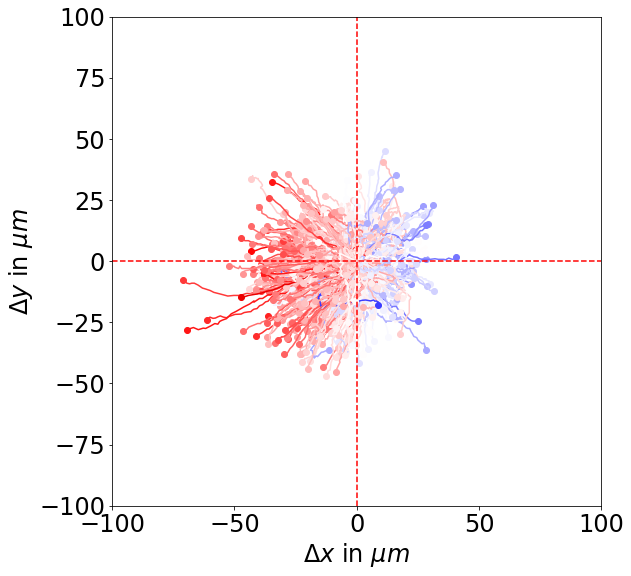

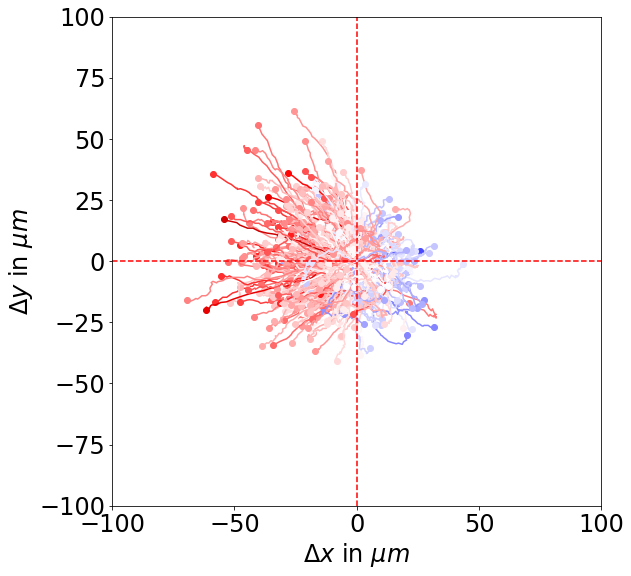

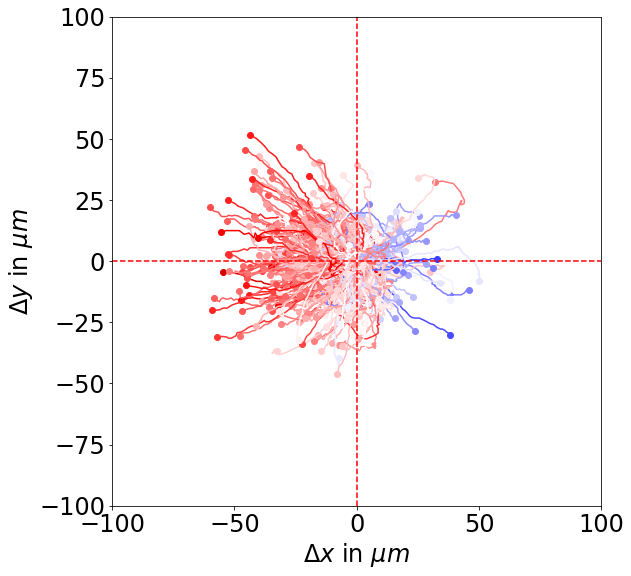

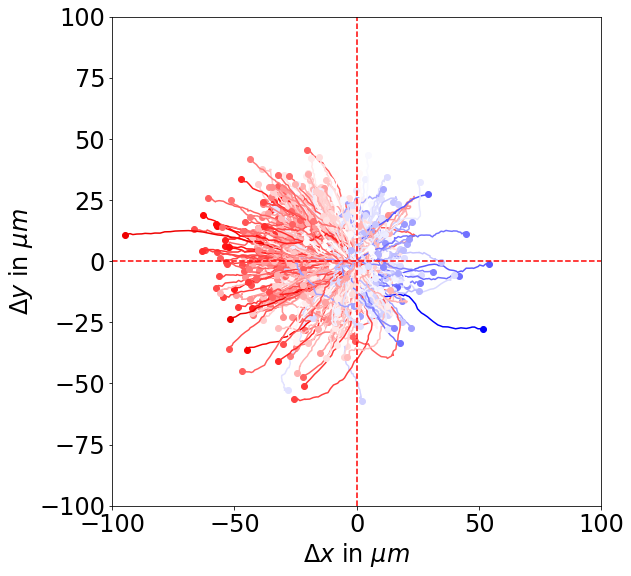

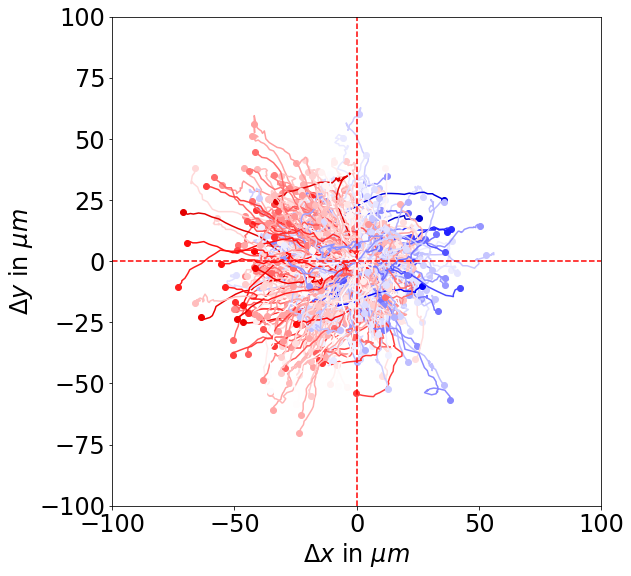

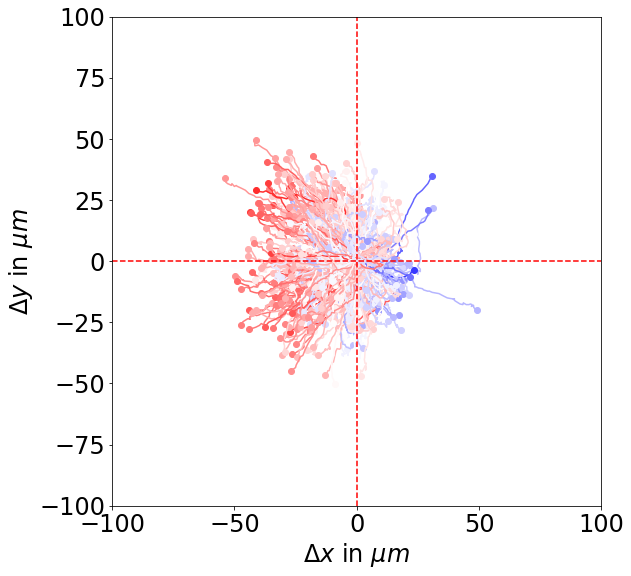

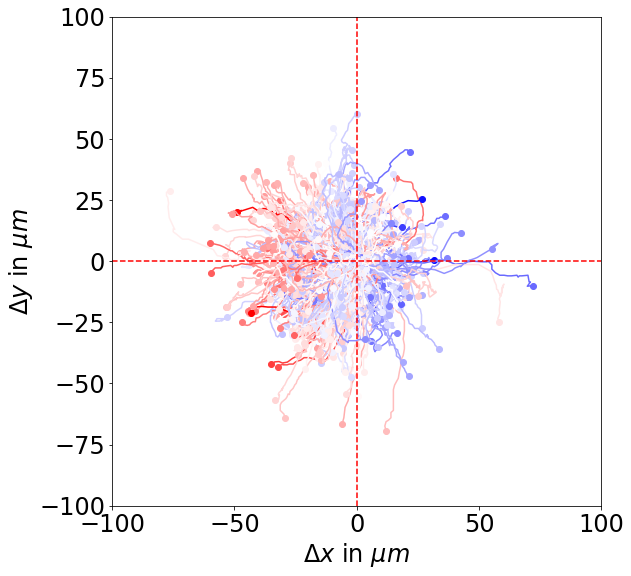

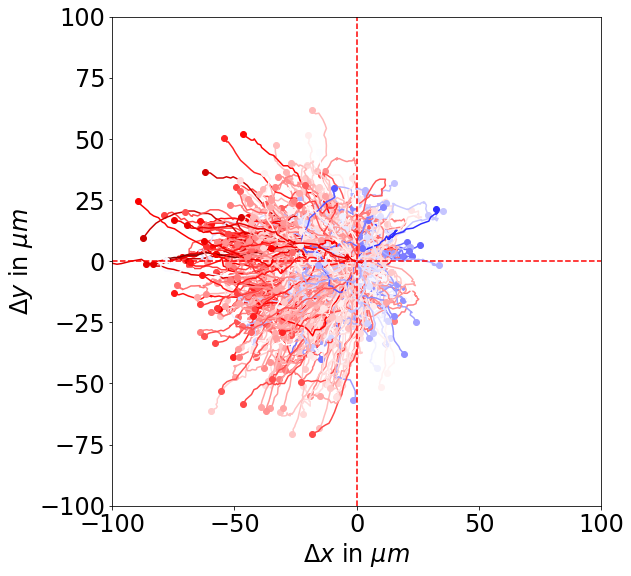

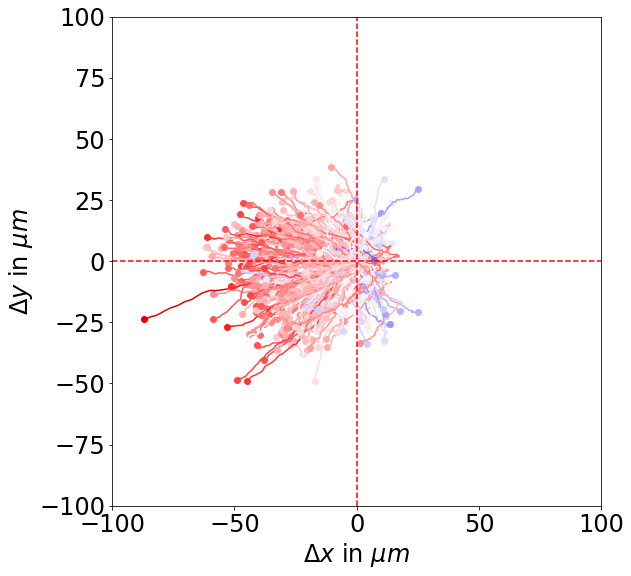

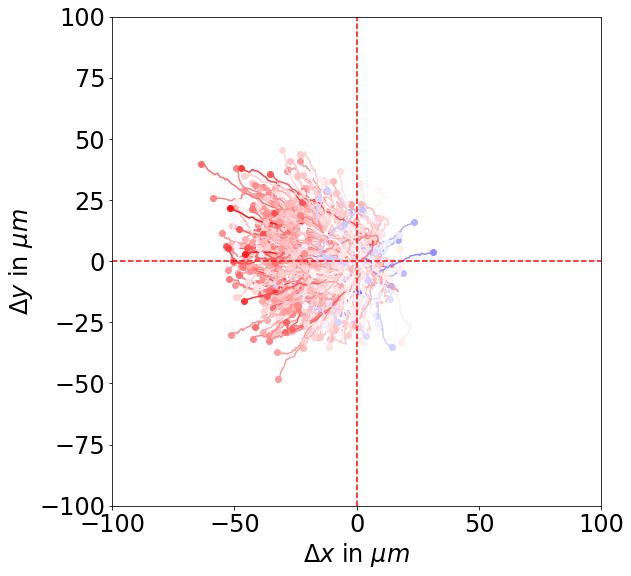

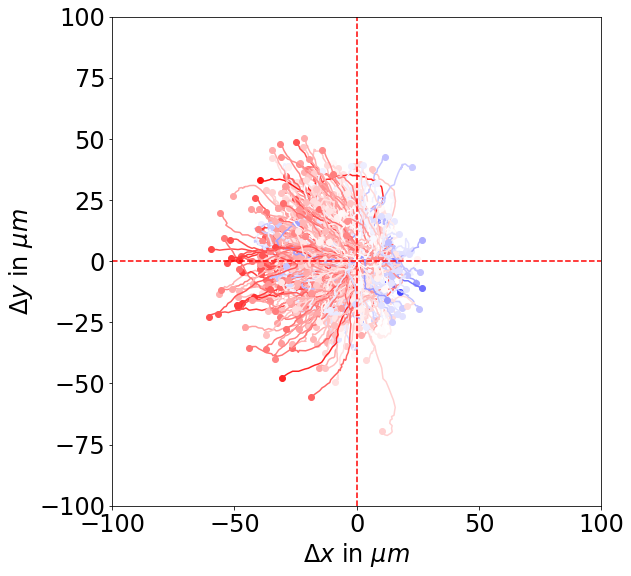

In [32]:
plt.rcParams.update({'font.size': 24})

for filename in phase_1_data_df["filename"].unique():
    tracking_data_df_ = phase_1_data_df[phase_1_data_df["filename"] == filename]

    fig, ax = plt.subplots(figsize=(9,9))
    for track_id in tracking_data_df_["TRACK_ID"].unique():
        single_track_df = tracking_data_df_[tracking_data_df_["TRACK_ID"]==track_id]
        if len(single_track_df.index) < parameters["end_phase_1"]:
            continue

        end_x = np.array(single_track_df["ORIGIN_X"])[-1]
        end_y = np.array(single_track_df["ORIGIN_Y"])[-1]
        
        vel_x = -np.array(single_track_df["vel_x_mu_per_h"])[-1]
        rel_vel = get_color_from_speed(vel_x)
        

        ax.plot(single_track_df["ORIGIN_X"],single_track_df["ORIGIN_Y"], color = cmap(rel_vel))
        #ax.plot(single_track_df["ORIGIN_X"],single_track_df["ORIGIN_Y"], color = "#ff7f00")
        #ax.plot([end_x],[end_y], color = "black", marker = "o") 
        ax.plot([end_x],[end_y], color = cmap(rel_vel), marker = "o")  
        

            
        #ax.plot([end_x],[end_y], color = "red", marker = "o")
        
    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)
    ax.axhline(0, color="red", linestyle = "--")
    ax.axvline(0, color="red", linestyle = "--")
    #title = filename.split("/")[]
    #ax.set_title(filename)    
    ax.set_xlabel("$\Delta x$ in $\mu m$")
    ax.set_ylabel("$\Delta y$ in $\mu m$")
    ax.set_aspect(1)
    #plt.tight_layout()
    plt.savefig(output_folder + "EC_trajectories_%s.png" % str(filename).split("/")[2])
    plt.savefig(output_folder + "EC_trajectories_%s.pdf" % str(filename).split("/")[2])

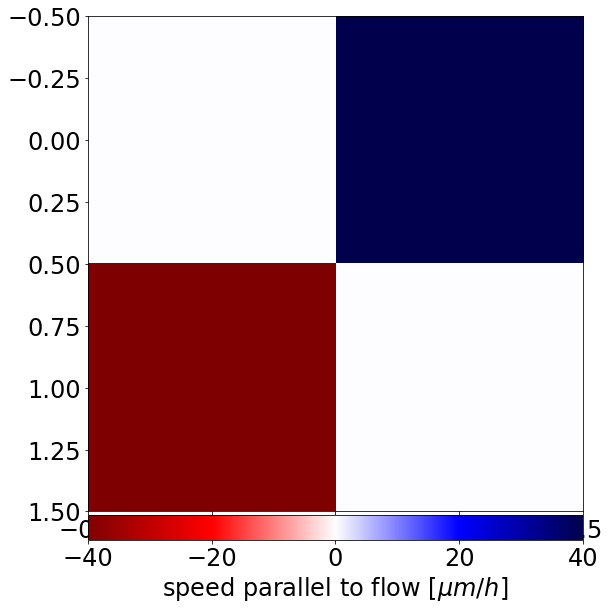

In [41]:
dummy = np.array([[0,max_value],[min_value,0]])

fig, ax = plt.subplots(figsize=(9,9))

p1 = ax.imshow(dummy, cmap = matplotlib.colormaps["seismic_r"])

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.05)
cbar = plt.colorbar(p1, cax=cax, orientation="horizontal")
cbar.set_label("speed parallel to flow [$\mu m/h$]")#, rotation=270)

plt.tight_layout()
plt.savefig(output_folder + "colormap.pdf")